In [15]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_ppl = pd.read_csv('Traffic_Crashes_-_People.csv')
df_cars = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [74]:
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']

df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

newdf = df_ppl[(df_ppl.person_type == "DRIVER")]

m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])


m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])


df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df


,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,Na

In [93]:
df

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,Na

In [94]:
df_19 = (df[df['crash_year'] >= 2019])

In [95]:
df_19['injury'] = df_19['injuries_total'] >= 1
df_19['injury'] = df_19['injury'].astype(int)
df_injury = df_19[df_19['injuries_total'] >= 1]

<ipython-input-95-0fb870a25322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['injury'] = df_19['injuries_total'] >= 1
<ipython-input-95-0fb870a25322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['injury'] = df_19['injury'].astype(int)


In [83]:
df_19

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year,injury
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020,0
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AW

In [96]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'crash_hour',
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'crash_day_of_week', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause', 'first_crash_type', 'crash_year']
df_19 = df_19[columns]

In [85]:
df_19[]

(284270, 19)

In [97]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df_19['rush_hour'] = (df_19['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))
df_19['rush_hour'].value_counts()


False    191666
True      92604
Name: rush_hour, dtype: int64

In [98]:
df_19['rush_hour'] = df_19['rush_hour'].astype(int)

In [88]:
df_19

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,crash_year,rush_hour
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE,OTHER NONCOLLISION,2020,0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,2019,0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION,2020,0
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE,2020,1
11,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,02/06/2020 12:00:00 AM,41.988622,-87.661653,0,2,0,MAGNOLIA AVE,$500 OR LESS,N,UNKNOWN,UNKNOWN,UNKNOWN,5,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960892,068cbdb2cdeabf6e8aeb80a0d6232ccf3e58343fd86596...,08/27/2021 11:00:00 PM,41.925774,-87.775205,0,8,23,ALTGELD ST,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,SIDESWIPE OPPOSITE DIRECTION,2021,0
1960896,0a9142cc8636fc80cac7037ad58a5ec25ef1653b421b2f...,08/27/2021 09:00:00 AM,41.871698,-87.627484,0,8,9,8TH ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,2021,1
1960910,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANGLE,2021,1
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANIMAL,2021,1


In [99]:
df_19['road_defect'].value_counts()

NO DEFECTS           233848
UNKNOWN               44893
RUT, HOLES             2291
OTHER                  1446
WORN SURFACE           1007
SHOULDER DEFECT         570
DEBRIS ON ROADWAY       215
Name: road_defect, dtype: int64

In [100]:
df_19 = df_19[df_19.road_defect != 'UNKNOWN']

In [102]:
def road_defect(status):
    if status == 'NO DEFECTS':
        return 0
    else:
        return 1
df_19['yes_road_defect'] = df_19['road_defect'].apply(road_defect)
df_19['yes_road_defect'] = df_19['yes_road_defect'].astype(int)
df_19['yes_road_defect'].value_counts()

0    233848
1      5529
Name: yes_road_defect, dtype: int64

In [105]:
df_19[['yes_road_defect', 'injury']].corr()

,yes_road_defect,injury
yes_road_defect,1.000000,-0.003107
injury,-0.003107,1.000000


In [112]:
df_19_rd = df_19.loc[df_19['yes_road_defect'] == 1]
df_19_nrd = df_19.loc[df_19['yes_road_defect'] == 0]

In [114]:
df_19_rd

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,crash_year,rush_hour,yes_road_defect
194,e7eb3eb86924f39481e267d05feb2efb01f22b00a03572...,11/16/2020 05:00:00 AM,41.832302,-87.695029,0,11,5,CALIFORNIA AVE,"OVER $1,500",NaN,DRY,WORN SURFACE,CLEAR,2,UNKNOWN,NaN,UNABLE TO DETERMINE,TURNING,2020,0,1
546,81dae5b6788bbe4c53db204291dfcbae67707ad392df92...,07/10/2020 09:52:00 AM,41.822969,-87.690734,0,7,9,PERSHING RD,"$501 - $1,500",NaN,DRY,OTHER,CLEAR,6,OTHER,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,2020,1,1
629,6e8e27d1659678682054a1b071403e0b5cd62f61d7ae6c...,01/27/2020 08:04:00 AM,42.010217,-87.667062,0,1,8,GREENLEAF AVE,"$501 - $1,500",NaN,WET,OTHER,CLEAR,2,OTHER,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,PARKED MOTOR VEHICLE,2020,1,1
642,8da6bbb8ac461b81a2997c1d7182ba5f35768fd25db5be...,01/27/2020 09:00:00 AM,41.818178,-87.743612,0,1,9,CICERO AVE,"$501 - $1,500",NaN,WET,WORN SURFACE,CLEAR,2,OTHER,NaN,UNABLE TO DETERMINE,REAR END,2020,1,1
687,cdcabe4900addb2b384616ee084a8b3b279502ff71b6f3...,01/27/2020 09:30:00 AM,41.858736,-87.638910,0,1,9,17TH ST,"$501 - $1,500",NaN,OTHER,WORN SURFACE,CLEAR,2,OTHER,NaN,UNABLE TO DETERMINE,ANGLE,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959220,ed1bc41190de4705a4432da1257c8593ca3f72cbe708a7...,09/11/2021 11:20:00 AM,41.857570,-87.638785,0,9,11,CANAL ST,"$501 - $1,500",NaN,DRY,OTHER,CLEAR,7,UNKNOWN,NaN,UNABLE TO DETERMINE,OTHER OBJECT,2021,0,1
1959225,7ed1f11fbc5df09b59d04f607b5e089d6d49f07e5ab741...,09/11/2021 11:12:00 AM,41.801682,-87.634288,0,9,11,51ST ST,"$501 - $1,500",Y,DRY,"RUT, HOLES",CLEAR,7,UNKNOWN,NaN,UNABLE TO DETERMINE,REAR END,2021,0,1
1959478,c33e1af9ca9445e730ab9b58618518ac87bb17cfc7ee58...,09/11/2021 05:15:00 AM,41.691340,-87.664043,0,9,5,VINCENNES AVE,"OVER $1,500",Y,DRY,OTHER,CLEAR,7,UNKNOWN,NaN,UNABLE TO DETERMINE,REAR END,2021,0,1
1960730,014a5899efc2aa4083c30bebc39b7fcb5d9596b975dce9...,08/27/2021 09:50:00 AM,41.721365,-87.643358,0,8,9,HALSTED ST,"OVER $1,500",Y,DRY,"RUT, HOLES",CLEAR,6,TEXTING,NaN,TEXTING,SIDESWIPE SAME DIRECTION,2021,1,1


In [117]:
count = df_19_rd.groupby('street_name')['yes_road_defect'].sum()

In [133]:
count.sort_values(ascending=False).head(5)

street_name
WESTERN AVE         224
ASHLAND AVE         141
HALSTED ST          120
CICERO AVE          119
LAKE SHORE DR NB    105
Name: yes_road_defect, dtype: int64

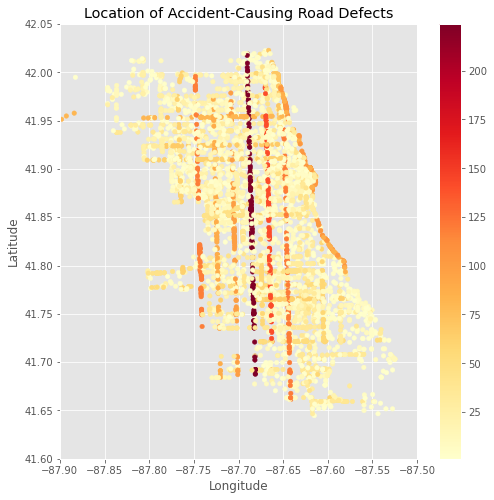

In [132]:
fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap =True)
hue = df_19_rd['street_name'].apply(lambda x: count[x])
points = ax.scatter(df_19_rd['longitude'], df_19_rd['latitude'], c=hue, s=20,
                   cmap = 'YlOrRd')

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Location of Accident-Causing Road Defects');


In [111]:
df_19_rd['injury'].value_counts()

0    4736
1     793
Name: injury, dtype: int64

In [113]:
df_19_nrd['injury'].value_counts()

0    198578
1     35270
Name: injury, dtype: int64

In [33]:
df_weekday_19 = df_19[(df_19['crash_day_of_week'] >= 2) & (df_19['crash_day_of_week'] <= 6)]
df_weekday_19['crash_day_of_week'].value_counts()

6    45977
5    40457
3    40141
4    39892
2    38839
Name: crash_day_of_week, dtype: int64

<AxesSubplot:xlabel='crash_hour'>

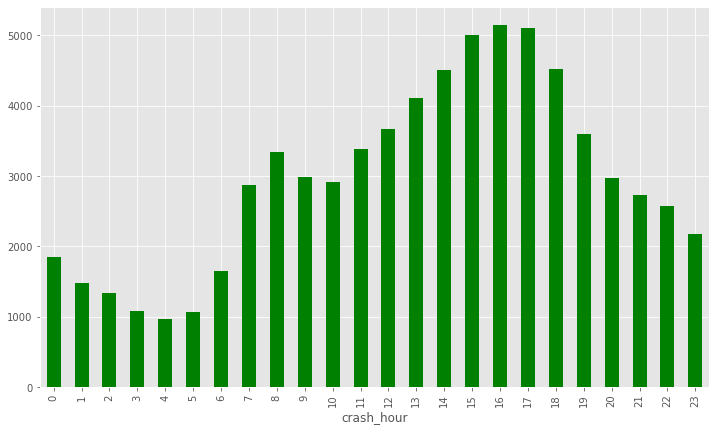

In [41]:
plt.style.use('ggplot')


accidents_by_hour = df_injury.groupby(df_injury['crash_hour']).count()
accidents_by_hour = accidents_by_hour['crash_date_x']
accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'green')

In [34]:
accidents_week = df_weekday_19.groupby(df_weekday_19['crash_hour']).count()['crash_date_x']

In [39]:
df_weekday_19

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year,injury,rush_hour
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,0,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020,0,False
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O871921,DRIVER,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD208731,NaN,04/13/2020 10:50:00 PM,30,FLASHING CONTROL SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN 

In [35]:
accidents_week

crash_hour
0      3579
1      2750
2      2124
3      1601
4      1692
5      2607
6      4671
7      9056
8     11301
9      9813
10     9640
11    10784
12    12352
13    12680
14    14002
15    16241
16    16774
17    16306
18    13113
19     9426
20     7576
21     6552
22     5823
23     4843
Name: crash_date_x, dtype: int64

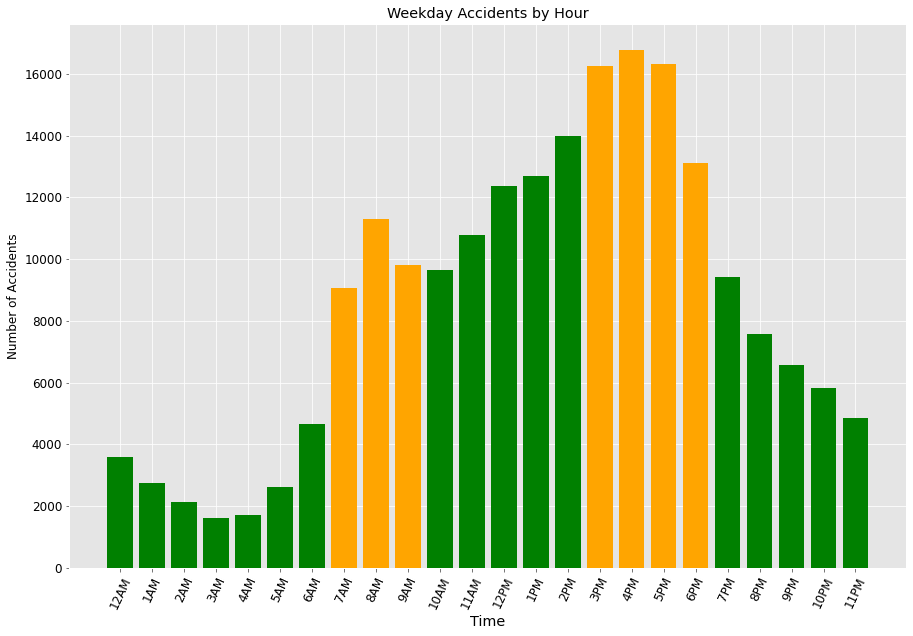

In [70]:
import datetime as dt
hours = ('12AM', '1AM', '2AM', '3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM')
crashes = [3579, 2750, 2124, 1601, 1692, 2607, 4671, 9056,
           11301, 9813, 9640, 10784, 12352, 12680, 14002, 
           16241, 16774, 16306, 13113, 9426, 7576, 6552, 5823, 4843]
plt.subplots(figsize=(15, 10))  
plt.xticks(rotation= 65, fontsize='large', c = 'black')
plt.yticks(c = 'black', fontsize='large')
plt.bar(hours, crashes, color = ['green', 'green', 'green','green','green','green','green','orange','orange','orange','green','green','green','green','green','orange','orange','orange','orange', 'green','green','green',])   

plt.title('Weekday Accidents by Hour')
plt.xlabel('Time', c='black', size='x-large')
plt.ylabel("Number of Accidents", c='black');



In [ ]:
accidents_week.plot(kind='bar', figsize=(12,7), color = 'green');

In [43]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Reckless/Poor Driving',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Reckless/Poor Driving',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Out of Driver's Control",
              'ANIMAL':"Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

df_19['Simple_Reason'] = df_19['prim_contributory_cause'].map(cause_dict)

<ipython-input-43-38d5ff89ea8e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['Simple_Reason'] = df_19['prim_contributory_cause'].map(cause_dict)


In [44]:
df_19

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year,injury,rush_hour,Simple_Reason
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,0,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020,0,False,Other/Unknown
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,

In [47]:
df_19 = df_19[df_19.road_defect != 'UNKNOWN']
def rd_defect(x):
    if (x == 'NO DEFECTS'):
        return 0
    else:
        return 1

df_19['road_defect'] = (df_19['road_defect'].apply(rd_defect))

In [73]:
df_19

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year,injury,rush_hour,Simple_Reason
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O871921,DRIVER,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD208731,NaN,04/13/2020 10:50:00 PM,30,FLASHING CONTROL SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,1,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,04/14/2020 10:00:00 AM,IMPROPER OVERTAKING/PASSING,FAILING TO REDUCE SPEED TO AVOID CRASH,1200,W,87TH ST,613.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,2,4,41.736044,-87.653404,POINT (-87.653404241798 41.736044089544),W 87TH ST,2020,0,0,Reckless/Poor Driving
7,834812,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,JD138756,02/03/2020 03:45:00 PM,1,DRIVER,NaN,792247.0,NaN,HONDA,CRV,IL,2014.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O834812,DRIVER,JD138756,792247.0,02/03/2020 03:45:00 PM,NaN,CHICAGO,IL,60645,F,32.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,DISREGARDED CONTROL DEVICES,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD138756,NaN,02/03/2020 03:45:00 PM,25,TRAFFIC SIGNAL,FUN

In [48]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df_19['rush_hour'] = (df_19['crash_hour'].apply(rush_hour) & df_19['crash_day_of_week'].apply(rush_hour_day))

In [45]:
df_19 = df_19[df_19.Simple_Reason != 'Other/Unknown']

In [46]:
df_19['Simple_Reason'].value_counts()

Reckless/Poor Driving      86421
Breaking Rules of Road     40932
Speed Related              14209
Out of Driver's Control    11944
Distracted Driving          2796
Drug/Alcohol Related        2049
Name: Simple_Reason, dtype: int64

In [51]:

df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)
df_injury = df_injury[df_injury.Simple_Reason != 'Other/Unknown']

<ipython-input-51-1d76835c37b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)


In [52]:
acc_by_reason = df_19.groupby(df_19['Simple_Reason']).count()['crash_unit_id']
inj_by_reason = df_injury.groupby(df_injury['Simple_Reason']).count()['crash_unit_id']

In [53]:
total_inj = acc_by_reason.sort_values(ascending=True)

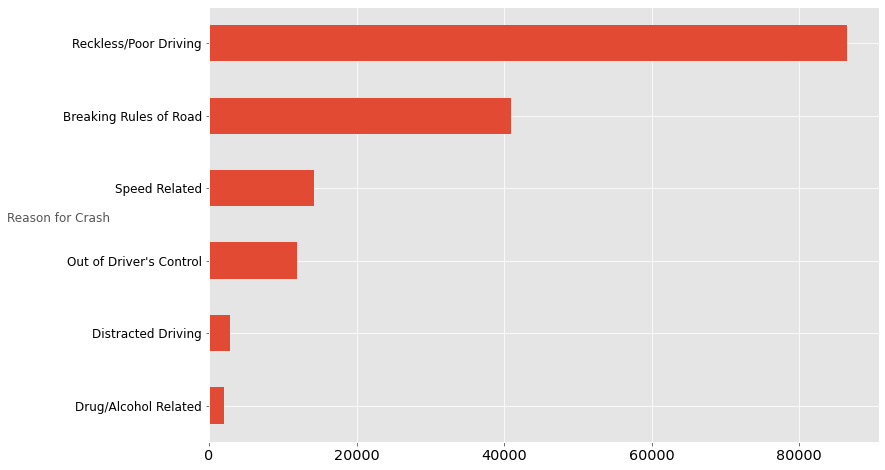

In [67]:
total_inj.plot(kind='barh', figsize=(12,8))

plt.xticks(rotation=0, c='black', fontsize='x-large')
plt.yticks(c='black', fontsize='large')
plt.ylabel('Reason for Crash', rotation = 0, fontsize='large');

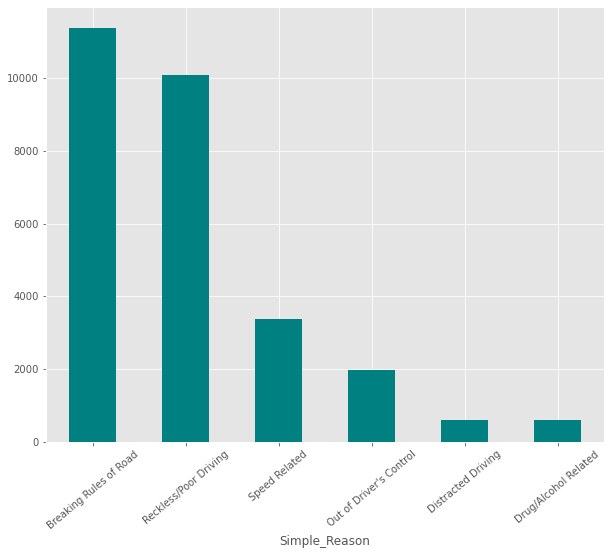

In [58]:
inj_by_reason.sort_values(ascending=False).plot(kind='bar',figsize=(10, 8), color = "teal")

plt.xticks(rotation=40);

In [56]:
reason_for_inj = (inj_by_reason / acc_by_reason).sort_values(ascending=True)

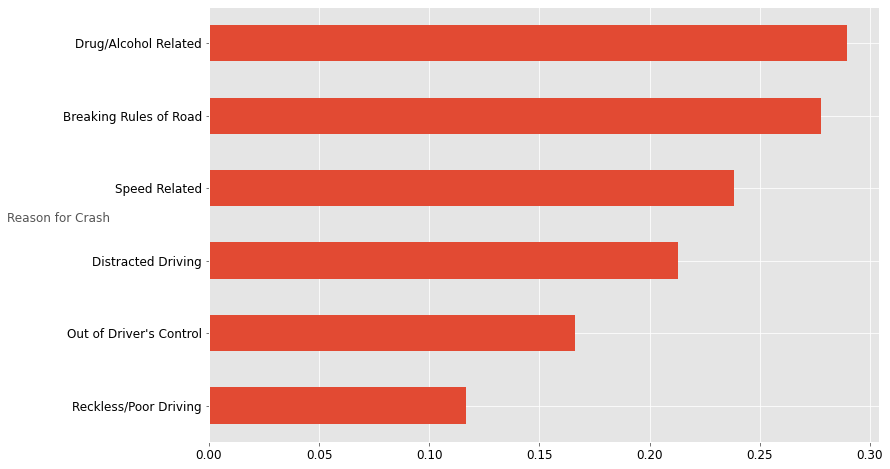

In [68]:
reason_for_inj.plot(kind='barh', figsize = (12, 8))

plt.xticks(rotation=0, c='black', fontsize='large')
plt.yticks(c='black', fontsize='large')
plt.ylabel('Reason for Crash', rotation = 0, fontsize='large');

In [60]:
df['rush_hour'].value_counts()

0    175380
1     96392
Name: rush_hour, dtype: int64

''

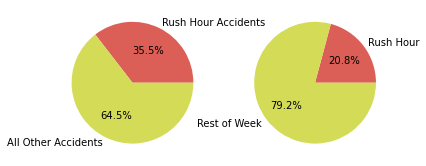

In [67]:
labels = 'Rush Hour Accidents', 'All Other Accidents'
sizes = [96392, 175380]

fig, axes = plt.subplots(1, 2)
axes[0].pie(sizes, labels = labels, autopct='%1.1f%%')
axes[1].pie([35, 133], labels = ('Rush Hour', 'Rest of Week'), autopct='%1.1f%%')
;

In [135]:
df['first_crash_type'].value_counts()

REAR END                        72218
TURNING                         47315
SIDESWIPE SAME DIRECTION        44174
PARKED MOTOR VEHICLE            38250
ANGLE                           35106
FIXED OBJECT                    11376
PEDESTRIAN                       5918
PEDALCYCLIST                     4022
SIDESWIPE OPPOSITE DIRECTION     3905
HEAD ON                          2745
REAR TO FRONT                    2061
OTHER OBJECT                     2017
REAR TO SIDE                     1180
OTHER NONCOLLISION                740
REAR TO REAR                      340
ANIMAL                            227
OVERTURNED                        155
TRAIN                              23
Name: first_crash_type, dtype: int64